In [29]:
import itertools
from statistics import median
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd

In [30]:
#Valores de los parametros medidos por el experimento Planck
planck_m = [0.31, 0.013, 0.013]
planck_l = [0.689, 0.012, 0.012]
planck_k = [0.0008, 0.0037, 0.0038]
planck_h_100 = [0.679, 0.013, 0.014]

In [21]:
#Observaciones de experimentos
z_o = [0.07, 0.09, 0.12, 0.17, 0.1791, 
     0.1993, 0.2, 0.24, 0.27, 0.28, 
     0.30, 0.31, 0.34, 0.35, 0.3519,
     0.36, 0.38, 0.3802, 0.4, 
     0.4004, 0.4247, 0.43, 0.44, 0.4497,
     0.47, 0.4783, 0.48, 0.51,
     0.52, 0.56, 0.57, 0.59, 0.5929,
     0.6, 0.61, 0.64, 0.6797, 0.73,
     0.7812, 0.8754, 0.88, 0.9, 1.037,
     1.3, 1.363, 1.43, 1.53, 1.75,
     1.965, 2.3, 2.33, 2.34, 2.36]

H_o = [69, 69, 68.6, 83, 75,
     75, 72.9, 79.69, 77, 88.8,
     81.7, 78.18, 83.8, 82.7,
     83, 79.94, 81.5, 83, 82.04,
     77, 87.1, 86.45, 84.81, 92.8,
     89, 80.9, 87.79, 90.4, 94.35,
     93.34, 96.8, 98.48, 104, 87.9,
     97.3, 98.82, 92, 97.3, 105,
     125, 90, 117, 154, 168,
     160, 177, 140, 202, 186.5,
     224, 224, 222, 226]

sigma_o = [19.6, 12, 26.2, 8, 4,
         5, 29.6, 2.99, 14, 36.64,
         6.22, 4.74, 3.66, 8.4, 14,
         3.38, 1.9, 13.5, 2.03, 10.2,
         11.2, 3.97, 1.83, 12.9, 34,
         9, 2.03, 1.9, 2.64, 2.3,
         3.4, 3.18, 13, 6.1, 2.1,
         2.98, 8, 7, 12, 17,
         40, 23, 20, 17, 33.6,
         18, 14, 40, 50.4, 8,
         8, 7, 8]

#values_o = []
#h_o = []

#for i in range(len(z_o)):
    #h_o.append(H_o[i]/100)
    #values_o.append((z_o[i], h_o[i], sigma_o[i]))
    #values_o.append((z_o[i], H_o[i], sigma_o[i]))

A partir de tres valores distintos $\{H(z) : z = a,b,c\}$

Usaremos las formulas surgidas al resolver el sistema de ecuaciones:

$
A(a,b,c) = (1+a)^2(1+b)^2(b - a) + (1+b)^2(1+c)^2(c - b) + (1+c)^2(1+a)^2(a - c)
$

$
\Omega_m H_0^2 = \frac{H^2(a)\left[(1 + b)^2 - (1+ c)^2 \right]}{-A(a,b,c)} + \frac{H^2(b)\left[(1 + c)^2 - (1+ a)^2 \right]}{-A(a,b,c)} +
     \frac{H^2(c)\left[(1 + a)^2 - (1+ b)^2 \right]}{-A(a,b,c)}\,,
$

$
\Omega_k H_0^2 = \frac{H^2(a)\left[(1 + b)^3 - (1+ c)^3 \right]}{A(a,b,c)} + \frac{H^2(b)\left[(1 + c)^3 - (1+ a)^3 \right]}{A(a,b,c)} + \frac{H^2(c)\left[(1 + a)^3 - (1+ b)^3 \right]}{A(a,b,c)}\,,
$

$
\Omega_\Lambda H_0^2 = \frac{H^2(a)(1+b)^2(1+c)^2(c-b)}{A(a,b,c)} + \frac{H^2(b)(1+c)^2(1+a)^2(a-c)}{A(a,b,c)} + \frac{H^2(c)(1+a)^3(1+b)^3(b-a)}{A(a,b,c)}\,,
$

$
H_0 = \sqrt{\Omega_m H_0^2 + \Omega_k H_0^2 + \Omega_\Lambda H_0^2}.
$

In [22]:
def A(z):
    return   ((1+z[0])**2*(1+z[1])**2*(z[1]-z[0]) +
             (1+z[1])**2*(1+z[2])**2*(z[2]-z[1]) +
             (1+z[2])**2*(1+z[0])**2*(z[0]-z[2]))

def omega_mh_calculator(values):
    z = (values[0][0], values[1][0], values[2][0])
    H = (values[0][1], values[1][1], values[2][1])
    
    temp = (H[0]**2*((1+z[1])**2 - (1+z[2])**2) +
        H[1]**2*((1+z[2])**2 - (1+z[0])**2) +
        H[2]**2*((1+z[0])**2 - (1+z[1])**2))

    return temp/-A(z)

def omega_lh_calculator(values):
    z = (values[0][0], values[1][0], values[2][0])
    H = (values[0][1], values[1][1], values[2][1])
    
    temp = (H[0]**2*(1+z[1])**2*(1+z[2])**2*(z[2]-z[1]) +
        H[1]**2*(1+z[2])**2*(1+z[0])**2*(z[0]-z[2]) +
        H[2]**2*(1+z[0])**2*(1+z[1])**2*(z[1]-z[0]))

    return temp/A(z)

def omega_kh_calculator(values):
    z = (values[0][0], values[1][0], values[2][0])
    H = (values[0][1], values[1][1], values[2][1])
    
    temp = (H[0]**2*((1+z[1])**3 - (1+z[2])**3) +
        H[1]**2*((1+z[2])**3 - (1+z[0])**3) +
        H[2]**2*((1+z[0])**3 - (1+z[1])**3))

    return temp/A(z)

In [28]:
#Calculo de valores con combinaciones de 3-tuplas de observaciones
omega_mh_values = []
omega_lh_values = []
omega_kh_values = []

for observation in itertools.combinations(zip(z_o, H_o),3):
    omega_mh_values.append(omega_mh_calculator(observation))
    omega_lh_values.append(omega_lh_calculator(observation))
    omega_kh_values.append(omega_kh_calculator(observation))

#Calculo y prediccion de la mediana
pred_omega_mh = [median(omega_mh_values)]
pred_omega_lh = [median(omega_lh_values)]
pred_omega_kh = [median(omega_kh_values)]

pred_h = [sqrt(pred_omega_mh[0] + pred_omega_lh[0] + pred_omega_kh[0])]
pred_m = [pred_omega_mh[0]/ pred_h[0]**2]
pred_l = [pred_omega_lh[0]/ pred_h[0]**2]
pred_k = [pred_omega_kh[0]/ pred_h[0]**2]

#Calculo de intervalos de confianza de los parametros
omega_mh_values.sort()
omega_lh_values.sort()
omega_kh_values.sort()

N = len(omega_mh_values)
deviation = 1/sqrt(4*N)

pred_omega_mh.append(omega_mh_values[round(N*(0.5 - deviation))] - pred_omega_mh[0])
pred_omega_mh.append(omega_mh_values[round(N*(0.5 + deviation))] - pred_omega_mh[0])

pred_omega_lh.append(omega_lh_values[round(N*(0.5 - deviation))] - pred_omega_lh[0])
pred_omega_lh.append(omega_lh_values[round(N*(0.5 + deviation))] - pred_omega_lh[0])

pred_omega_kh.append(omega_kh_values[round(N*(0.5 - deviation))] - pred_omega_kh[0])
pred_omega_kh.append(omega_kh_values[round(N*(0.5 + deviation))] - pred_omega_kh[0])

temp_mlk = [sqrt(pred_omega_mh[1]**2 + pred_omega_lh[1]**2 + pred_omega_kh[1]**2), sqrt(pred_omega_mh[2]**2 + pred_omega_lh[2]**2 + pred_omega_kh[2]**2)]

pred_h.append(1/(2*pred_h[0])*temp_mlk[0])
pred_h.append(1/(2*pred_h[0])*temp_mlk[1])

pred_m.append(pred_m[0]*sqrt((pred_omega_mh[1]/pred_omega_mh[0])**2 + (temp_mlk[0]/pred_h[0]**2)**2))
pred_m.append(pred_m[0]*sqrt((pred_omega_mh[2]/pred_omega_mh[0])**2 + (temp_mlk[1]/pred_h[0]**2)**2))

pred_l.append(pred_l[0]*sqrt((pred_omega_lh[1]/pred_omega_lh[0])**2 + (temp_mlk[0]/pred_h[0]**2)**2))
pred_l.append(pred_l[0]*sqrt((pred_omega_lh[2]/pred_omega_lh[0])**2 + (temp_mlk[1]/pred_h[0]**2)**2))

pred_k.append(abs(pred_k[0])*sqrt((pred_omega_kh[1]/pred_omega_kh[0])**2 + (temp_mlk[0]/pred_h[0]**2)**2))
pred_k.append(abs(pred_k[0])*sqrt((pred_omega_kh[2]/pred_omega_kh[0])**2 + (temp_mlk[1]/pred_h[0]**2)**2))

#Dataset con la mediana de cada parametro y su intervalo de confianza
data_dict = {}
data_dict['category'] = ['$\Omega_m$','$\Omega_\Lambda$','$\Omega_k$', '$H_0 / 100$']
data_dict['median'] = [pred_m[0], pred_l[0], pred_k[0],pred_h[0]/100]
data_dict['lower'] = [pred_m[0] - pred_m[1],pred_l[0] - pred_l[1],pred_k[0] - pred_k[1],(pred_h[0] - pred_h[1])/100]
data_dict['upper'] = [pred_m[0] + pred_m[2],pred_l[0] + pred_l[2],pred_k[0] + pred_k[2],(pred_h[0] + pred_h[2])/100]
parametros = pd.DataFrame(data_dict)

parametros

,category,median,lower,upper
0,$\Omega_m$,0.331909,0.315720,0.348815
1,$\Omega_\Lambda$,0.698771,0.667472,0.740972
2,$\Omega_k$,-0.030680,-0.058201,-0.001676
3,$H_0 / 100$,0.668864,0.657040,0.683124


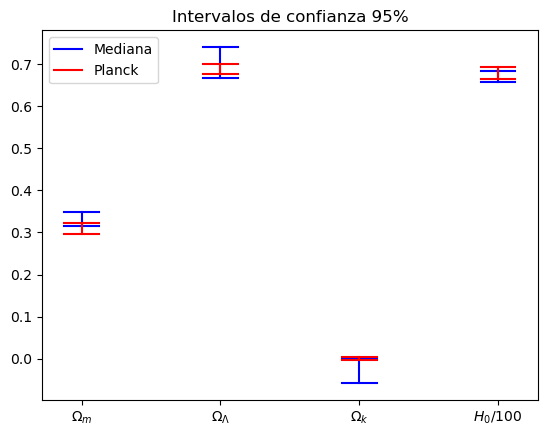

In [33]:
#Dibujamos los resultados
def plot_confidence_interval(x, values, label = None, color='blue', horizontal_line_width=0.25):
    
    left = x - horizontal_line_width / 2
    top = values[0] + values[2]
    right = x + horizontal_line_width / 2
    bottom = values[0] - values[1]
    plt.plot([x, x], [top, bottom], color=color, label=label)
    plt.plot([left, right], [top, top], color=color)
    plt.plot([left, right], [bottom, bottom], color=color)
    return


plt.xticks([1, 2, 3, 4], ['$\Omega_m$','$\Omega_\Lambda$','$\Omega_k$', '$H_0 / 100$'])
plt.title('Intervalos de confianza 95%')
plot_confidence_interval(1, pred_m, label="Mediana")
plot_confidence_interval(2, pred_l)
plot_confidence_interval(3, pred_k)
plot_confidence_interval(4, [h/100 for h in pred_h])

plot_confidence_interval(1, planck_m, color='red', label="Planck")
plot_confidence_interval(2, planck_l, color='red')
plot_confidence_interval(3, planck_k, color='red')
plot_confidence_interval(4, planck_h_100, color='red')
plt.legend()
plt.show()